In [43]:
import pandas as pd
import numpy as np

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [5]:
data = pd.read_csv("music_mental_survey_results.csv")
data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [3]:
def print_unique_items_in_columns():
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"Column: {column}")
        print(f"Unique values: {unique_values}")
        print("-" * 30)

In [7]:
columns_to_remove = ["Timestamp", "Primary streaming service", "Hours per day", "Permissions"]
data = data.drop(columns=columns_to_remove)

## Data Cleaning

In [ ]:
#* Part 1 - Fill NaN values
from sklearn.impute import SimpleImputer
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["BPM"] = data["BPM"].fillna(data["BPM"].mean())

nan_columns = ["While working", "Instrumentalist", "Foreign languages", "Composer", "Music effects"]
categorial_imputer = SimpleImputer(strategy="most_frequent")
for nan_column in nan_columns:
     data[[nan_column]] = categorial_imputer.fit_transform(data[[nan_column]])

data.isna().sum()

Age                             0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects                   0
dtype: int64

In [9]:
total_rows = 736
no_effect_count = len(data[data['Music effects'] == 'No effect'])
percentage_no_effect = (no_effect_count / total_rows) * 100

print(f"Percentage of rows with 'No effect': {percentage_no_effect:.2f}%")

Percentage of rows with 'No effect': 22.96%


In [11]:
mask = data['Music effects'] == 'No effect'
data = data.drop(data[mask].index)
data = data.reset_index(drop=True)

data

,Age,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,63.0,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve
2,61.0,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
3,18.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
4,18.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,17.0,Yes,Yes,No,Rock,Yes,Yes,120.0,Very frequently,Rarely,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
563,18.0,Yes,Yes,No,Pop,Yes,Yes,160.0,Rarely,Rarely,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
564,19.0,Yes,No,Yes,Rap,Yes,No,120.0,Rarely,Sometimes,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
565,19.0,Yes,Yes,No,Classical,No,No,170.0,Very frequently,Never,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


In [12]:
#* Part 2 - Encoding
yes_no_columns = ["While working", "Instrumentalist", "Composer", "Exploratory", "Foreign languages"]
frequency_columns = ["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]", "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]

for column in yes_no_columns:
     data[column] = data[column].map({'No':0, 'Yes':1})
for column in frequency_columns:
     data[column] = data[column].map({'Never':0, 'Rarely':1, 'Sometimes':2, 'Very frequently':3})

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Output (y)'] = label_encoder.fit_transform(data['Fav genre']).astype(int)
data = data.drop(columns=['Fav genre'])

data.head()

,Age,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Output (y)
0,18.0,1,1,1,1,1,156.0,1,0,1,...,2,3,0,2,3.0,0.0,1.0,0.0,Improve,8
1,63.0,1,0,0,1,0,119.0,2,0,0,...,2,1,3,1,7.0,2.0,2.0,1.0,Improve,14
2,61.0,1,0,1,1,1,84.0,2,0,0,...,2,0,0,0,9.0,7.0,3.0,3.0,Improve,6
3,18.0,1,0,0,1,0,107.0,0,0,1,...,3,3,0,1,7.0,2.0,5.0,9.0,Improve,12
4,18.0,1,1,1,1,1,86.0,1,2,0,...,3,3,3,0,8.0,8.0,7.0,7.0,Improve,6


In [15]:
data['Music effects'] = data['Music effects'].map({"Improve":0, 'Worsen':1})

In [17]:
data

,Age,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Output (y)
0,18.0,1,1,1,1,1,156.0,1,0,1,...,2,3,0,2,3.0,0.0,1.0,0.0,0,8
1,63.0,1,0,0,1,0,119.0,2,0,0,...,2,1,3,1,7.0,2.0,2.0,1.0,0,14
2,61.0,1,0,1,1,1,84.0,2,0,0,...,2,0,0,0,9.0,7.0,3.0,3.0,0,6
3,18.0,1,0,0,1,0,107.0,0,0,1,...,3,3,0,1,7.0,2.0,5.0,9.0,0,12
4,18.0,1,1,1,1,1,86.0,1,2,0,...,3,3,3,0,8.0,8.0,7.0,7.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,17.0,1,1,0,1,1,120.0,3,1,0,...,0,1,3,0,7.0,6.0,0.0,9.0,0,14
563,18.0,1,1,0,1,1,160.0,1,1,0,...,0,0,2,2,3.0,2.0,2.0,5.0,0,11
564,19.0,1,0,1,1,0,120.0,1,2,2,...,2,2,1,1,2.0,2.0,2.0,2.0,0,13
565,19.0,1,1,0,0,0,170.0,3,0,0,...,0,0,0,2,2.0,3.0,2.0,1.0,0,0


## Simple Modeling (Multi-class Classification)

In [20]:
y = data['Output (y)']
X = data.drop(columns=['Output (y)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6052631578947368


## Visualising the Results

In [27]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

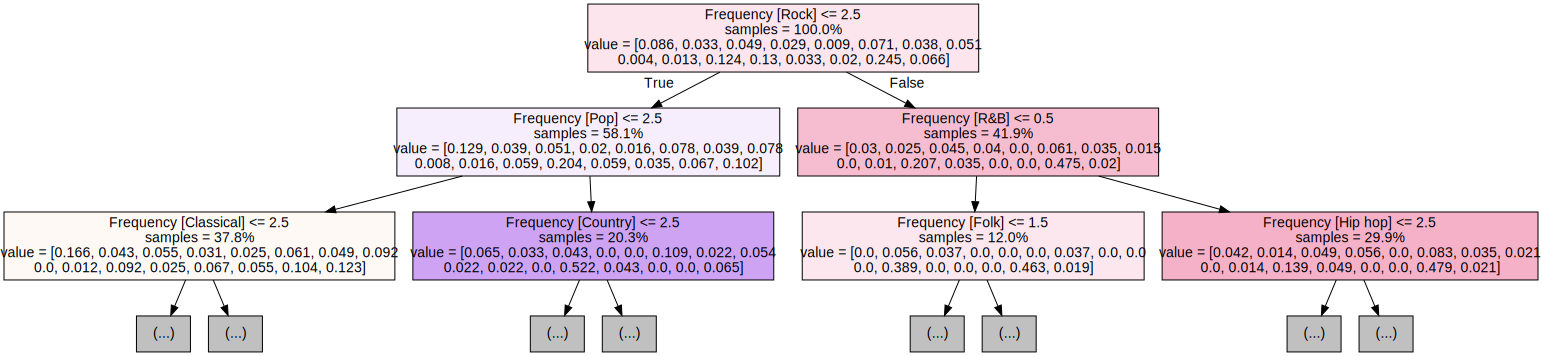

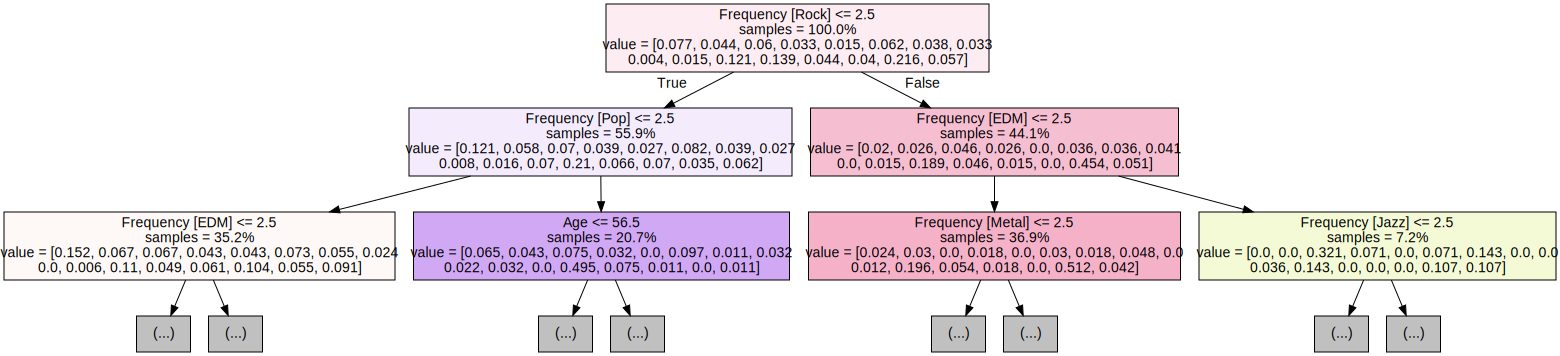

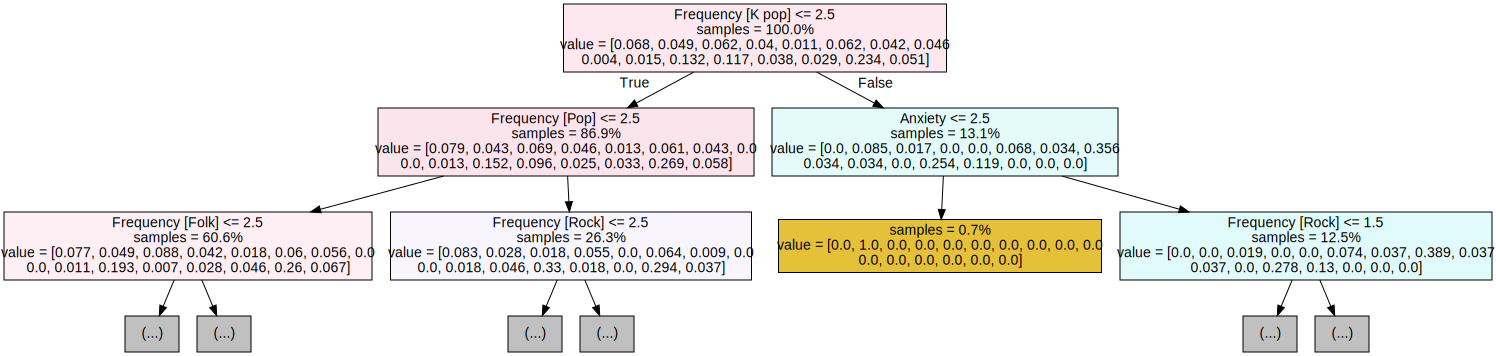

In [28]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                                        feature_names=X_train.columns,  
                                        filled=True,  
                                        max_depth=2, 
                                        impurity=False, 
                                        proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

## Adjusting Hyperparameters for Best Performance

In [41]:
param_dist = {'n_estimators': randint(100, 500),
                'max_depth': randint(5, 20)}
model = RandomForestClassifier()
rand_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, 
                                    scoring="f1_macro", n_jobs=-1, verbose=2, random_state=42)
rand_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END .....................max_depth=11, n_estimators=448; total time=   0.4s
[CV] END .....................max_depth=11, n_estimators=448; total time=   0.4s
[CV] END .....................max_depth=19, n_estimators=206; total time=   0.2s
[CV] END .....................max_depth=19, n_estimators=206; total time=   0.2s
[CV] END .....................max_depth=11, n_estimators=448; total time=   0.4s
[CV] END .....................max_depth=19, n_estimators=206; total time=   0.2s
[CV] END .....................max_depth=11, n_estimators=448; total time=   0.4s
[CV] END .....................max_depth=11, n_estimators=448; total time=   0.4s
[CV] END .....................max_depth=19, n_estimators=206; total time=   0.2s
[CV] END .....................max_depth=19, n_estimators=206; total time=   0.2s
[CV] END .....................max_depth=12, n_estimators=288; total time=   0.3s
[CV] END .....................max_depth=12, n_estimators=288; total time=   0.3s
[CV] END ...................

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x139d08aa0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x139c86720>},
                   random_state=42, scoring='f1_macro', verbose=2)

In [42]:
best_model = rand_search.best_estimator_

In [46]:
from sklearn.metrics import f1_score, accuracy_score
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="macro")
accuracy = accuracy_score(y_test, y_pred)

print(f"F1-score-macro: {f1}")
print(f"Accuracy: {accuracy}")

F1-score-macro: 0.3621718559218559
Accuracy: 0.5964912280701754
